<a href="https://colab.research.google.com/github/christianlung/PhysicsLab/blob/main/4AL_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

# Import required libraries
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

Mounted at drive


Differences in amplitude can be accounted for margin of error between each pull. However, that shouldn't affect the period of oscillation.

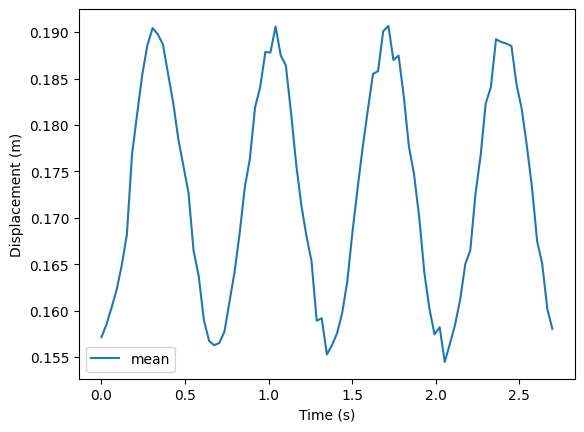

In [ ]:
# obtain window of 4 oscillation for each data
n1 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Normal_1.txt', delimiter=';')
n1_s = n1[:,0]/1000
n1_m = n1[:,1]/100
n1_time_window = n1_s[162:251] - n1_s[162]
n1_position_window = n1_m[162:251]

n2 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Normal_2.txt', delimiter=';')
n2_s = n2[:,0]/1000
n2_m = n2[:,1]/100
n2_time_window = n2_s[169:258] - n2_s[169]
n2_position_window = n2_m[169:258]

n3 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Normal_3.txt', delimiter=';')
n3_s = n3[:,0]/1000
n3_m = n3[:,1]/100
n3_time_window = n3_s[167:256] - n3_s[167]
n3_position_window = n3_m[167:256]

n_mean_time_window = n1_time_window[0:89]
n_mean_position_window = (n1_position_window+n2_position_window+n3_position_window)/3

# plt.plot(n1_time_window, n1_position_window, label = "n1")
# plt.plot(n2_time_window, n2_position_window, label = "n2")
# plt.plot(n3_time_window, n3_position_window, label = "n3")
plt.plot(n_mean_time_window, n_mean_position_window, label = "mean")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

#n2 will be our model data

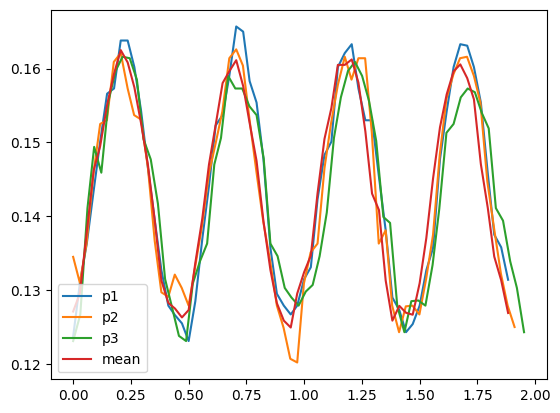

In [ ]:
p1 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Parallel_1.txt', delimiter=';')
p1_s = p1[:,0]/1000
p1_m = p1[:,1]/100
p1_time_window = p1_s[97:162] - p1_s[97]
p1_position_window = p1_m[97:162]

p2 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Parallel_2.txt', delimiter=';')
p2_s = p2[:,0]/1000
p2_m = p2[:,1]/100
p2_time_window = p2_s[113:178] - p2_s[113]
p2_position_window = p2_m[113:178]

p3 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Parallel_3.txt', delimiter=';')
p3_s = p3[:,0]/1000
p3_m = p3[:,1]/100
p3_time_window = p3_s[107:172] - p3_s[107]
p3_position_window = p3_m[107:172]

p_mean_time_window = p1_time_window[0:65]
p_mean_position_window = (p1_position_window+p2_position_window+p3_position_window)/3

plt.plot(p1_time_window, p1_position_window, label = "p1")
plt.plot(p2_time_window, p2_position_window, label = "p2")
plt.plot(p3_time_window, p3_position_window, label = "p3")
plt.plot(p_mean_time_window, p_mean_position_window, label = "mean")
plt.legend()
plt.show()

#p1 will be our model data

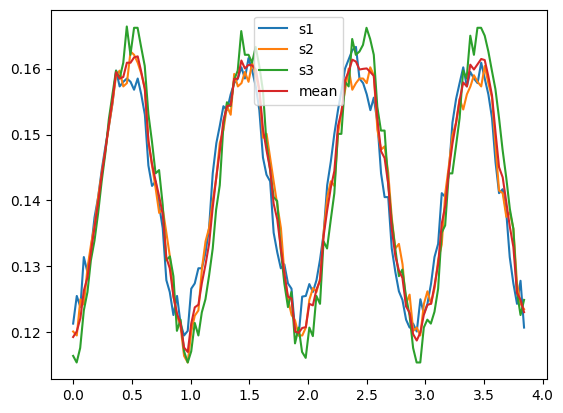

In [ ]:
s1 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Serial_1.txt', delimiter=';')
s1_s = s1[:,0]/1000
s1_m = s1[:,1]/100
s1_time_window = s1_s[92:219] - s1_s[92]
s1_position_window = s1_m[92:219]

s2 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Serial_2.txt', delimiter=';')
s2_s = s2[:,0]/1000
s2_m = s2[:,1]/100
s2_time_window = s2_s[95:222] - s2_s[95]
s2_position_window = s2_m[95:222]

s3 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project/Serial_3.txt', delimiter=';')
s3_s = s3[:,0]/1000
s3_m = s3[:,1]/100
s3_time_window = s3_s[105:232] - s3_s[105]
s3_position_window = s3_m[105:232]

s_mean_time_window = s1_time_window[0:127]
s_mean_position_window = (s1_position_window+s2_position_window+s3_position_window)/3

plt.plot(s1_time_window, s1_position_window, label = "s1")
plt.plot(s2_time_window, s2_position_window, label = "s2")
plt.plot(s3_time_window, s3_position_window, label = "s3")
plt.plot(s_mean_time_window, s_mean_position_window, label = "mean")
plt.legend()
plt.show()

#s3 will be our model data

Results should be 6 graphs: 3 for Trial 1 of each method. 3 for the mean of each method. The curve fit function should be applied and the resulting period should be compared to the predicted period.

In [ ]:
def sin_fit_function(time, amplitude, angular_frequency, phase, offset):
  height = amplitude*np.sin(angular_frequency*time + phase) + offset
  return height

In [ ]:
#guessing parameters for best n

guess_n_amplitude = (np.max(n2_position_window) - np.min(n2_position_window))/2
guess_n_angular_frequency = 2*np.pi/0.7
guess_n_phase = 5
guess_n_offset = np.mean(n2_position_window)
guess_n_params = [guess_n_amplitude, guess_n_angular_frequency, guess_n_phase, guess_n_offset]

Optimal Period for best n: 0.6896739960512677


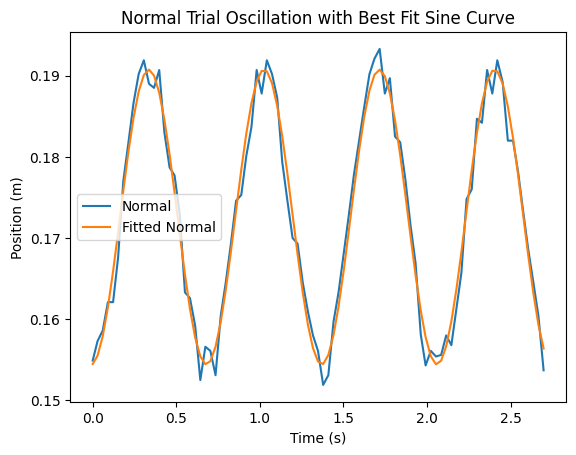

In [ ]:
#best fit curve for best n
optimal_n, n_covariance = sp.curve_fit(
    sin_fit_function, n2_time_window, n2_position_window, p0 = guess_n_params)
fitted_n = sin_fit_function(n2_time_window, *optimal_n)
print('Optimal Period for best n: ' + str(2*np.pi/optimal_n[1]))

plt.plot(n2_time_window, n2_position_window, label="Normal")
plt.plot(n2_time_window, fitted_n, label="Fitted Normal")
plt.title("Normal Trial Oscillation with Best Fit Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [ ]:
#guessing parameters for n mean

guess_n_mean_amplitude = (np.max(n_mean_position_window) - np.min(n_mean_position_window))/2
guess_n_mean_angular_frequency = 2*np.pi/0.7
guess_n_mean_phase = 5
guess_n_mean_offset = np.mean(n_mean_position_window)
guess_n_mean_params = [guess_n_mean_amplitude, guess_n_mean_angular_frequency, guess_n_mean_phase, guess_n_mean_offset]

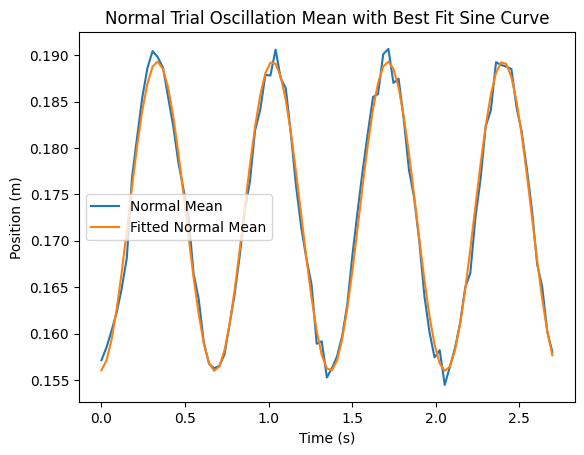

In [ ]:
#best fit curve for n mean
optimal_n_mean, n_mean_covariance = sp.curve_fit(
    sin_fit_function, n_mean_time_window, n_mean_position_window, p0 = guess_n_mean_params)
fitted_n_mean = sin_fit_function(n_mean_time_window, *optimal_n_mean)
# print('Optimal Period for best n mean: ' + str(2*np.pi/optimal_n_mean[1]) + " +- " + str(np.sqrt(n_mean_covariance[1,1])))

plt.plot(n_mean_time_window, n_mean_position_window, label="Normal Mean")
plt.plot(n_mean_time_window, fitted_n_mean, label="Fitted Normal Mean")
plt.title("Normal Trial Oscillation Mean with Best Fit Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [ ]:
#guessing parameters for best p

guess_p_amplitude = (np.max(p1_position_window) - np.min(p1_position_window))/2
guess_p_angular_frequency = 2*np.pi/0.5
guess_p_phase = 5.5
guess_p_offset = np.mean(p1_position_window)
guess_p_params = [guess_p_amplitude, guess_p_angular_frequency, guess_p_phase, guess_p_offset]

[[ 1.43583530e-07 -8.00594789e-07  8.31777897e-07 -4.99064996e-09]
 [-8.00594789e-07  1.21197452e-03 -1.15434283e-03  1.75629825e-06]
 [ 8.31777897e-07 -1.15434283e-03  1.46988661e-03 -1.71035479e-06]
 [-4.99064996e-09  1.75629825e-06 -1.71035479e-06  7.22078450e-08]]
Optimal Period for best p: 0.4919885866560532


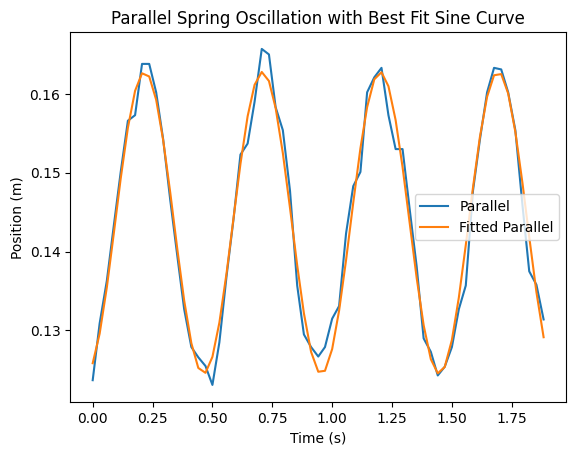

In [ ]:
#best fit curve for best p
optimal_p, p_covariance = sp.curve_fit(
    sin_fit_function, p1_time_window, p1_position_window, p0 = guess_p_params)
fitted_p = sin_fit_function(p1_time_window, *optimal_p)
print(p_covariance)
print('Optimal Period for best p: ' + str(2*np.pi/optimal_p[1]))

plt.plot(p1_time_window, p1_position_window, label="Parallel")
plt.plot(p1_time_window, fitted_p, label="Fitted Parallel")
plt.title("Parallel Spring Oscillation with Best Fit Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [ ]:
#guessing parameters for p mean

guess_p_mean_amplitude = (np.max(p_mean_position_window) - np.min(p_mean_position_window))/2
guess_p_mean_angular_frequency = 2*np.pi/0.48
guess_p_mean_phase = 5
guess_p_mean_offset = np.mean(p_mean_position_window)
guess_p_mean_params = [guess_p_mean_amplitude, guess_p_mean_angular_frequency, guess_p_mean_phase, guess_p_mean_offset]

[ 0.017869   12.91384968  5.16441924  0.14312126]


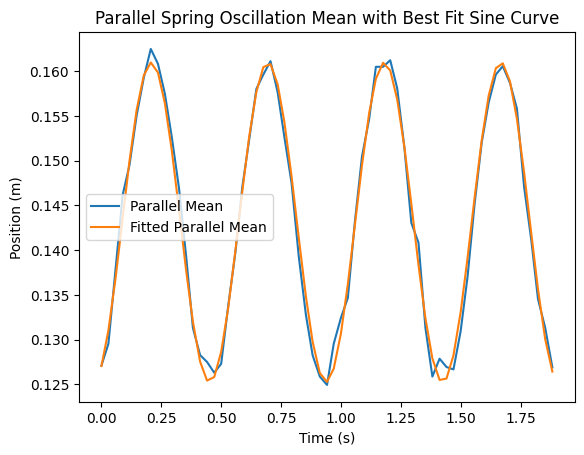

In [ ]:
#best fit curve for p mean
optimal_p_mean, p_mean_covariance = sp.curve_fit(
    sin_fit_function, p_mean_time_window, p_mean_position_window, p0 = guess_p_mean_params)
fitted_p_mean = sin_fit_function(p_mean_time_window, *optimal_p_mean)
# print('Optimal Period for best p mean: ' + str(2*np.pi/optimal_p_mean[1]) + " +- " + str(np.sqrt(p_mean_covariance[1,1])))
print(optimal_p_mean)


plt.plot(p_mean_time_window, p_mean_position_window, label="Parallel Mean")
plt.plot(p_mean_time_window, fitted_p_mean, label="Fitted Parallel Mean")
plt.title("Parallel Spring Oscillation Mean with Best Fit Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [ ]:
#guessing parameters for best s

guess_s_amplitude = (np.max(s3_position_window) - np.min(s3_position_window))/2
guess_s_angular_frequency = 2*np.pi
guess_s_phase = 1.7 + np.pi
guess_s_offset = np.mean(s3_position_window)
guess_s_params = [guess_s_amplitude, guess_s_angular_frequency, guess_s_phase, guess_s_offset]

Optimal Period for best s: 0.9873088753599069


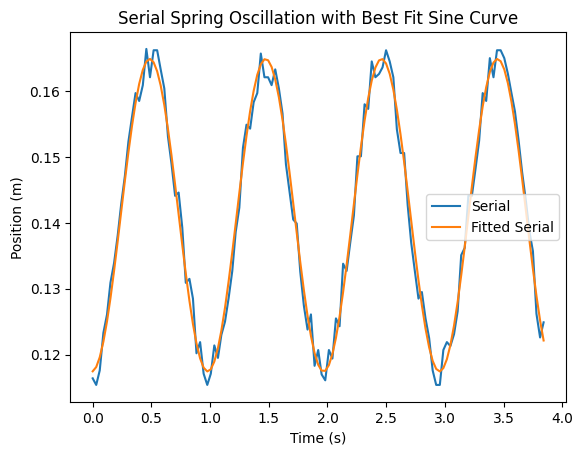

In [ ]:
#best fit curve for best s
optimal_s, s_covariance = sp.curve_fit(
    sin_fit_function, s3_time_window, s3_position_window, p0 = guess_s_params)
fitted_s = sin_fit_function(s3_time_window, *optimal_s)
print('Optimal Period for best s: ' + str(2*np.pi/optimal_s[1]))

plt.plot(s3_time_window, s3_position_window, label="Serial")
plt.plot(s3_time_window, fitted_s, label="Fitted Serial")
plt.title("Serial Spring Oscillation with Best Fit Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [ ]:
#guessing parameters for s mean

guess_s_mean_amplitude = (np.max(s_mean_position_window) - np.min(s_mean_position_window))/2
guess_s_mean_angular_frequency = 2*np.pi
guess_s_mean_phase = 1.7 + np.pi
guess_s_mean_offset = np.mean(s_mean_position_window)
guess_s_mean_params = [guess_s_mean_amplitude, guess_s_mean_angular_frequency, guess_s_mean_phase, guess_s_mean_offset]

[0.02097103 6.37923195 4.84740724 0.14114925]


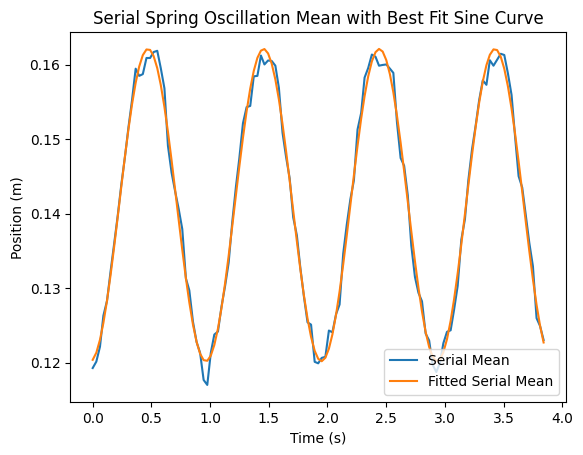

In [ ]:
#best fit curve for s mean
optimal_s_mean, s_mean_covariance = sp.curve_fit(
    sin_fit_function, s_mean_time_window, s_mean_position_window, p0 = guess_s_mean_params)
fitted_s_mean = sin_fit_function(s_mean_time_window, *optimal_s_mean)
# print('Optimal Period for best s mean: ' + str(2*np.pi/optimal_s_mean[1]) + " +- " + str(np.sqrt(s_mean_covariance[1,1])))
print(optimal_s_mean)


plt.plot(s_mean_time_window, s_mean_position_window, label="Serial Mean")
plt.plot(s_mean_time_window, fitted_s_mean, label="Fitted Serial Mean")
plt.title("Serial Spring Oscillation Mean with Best Fit Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

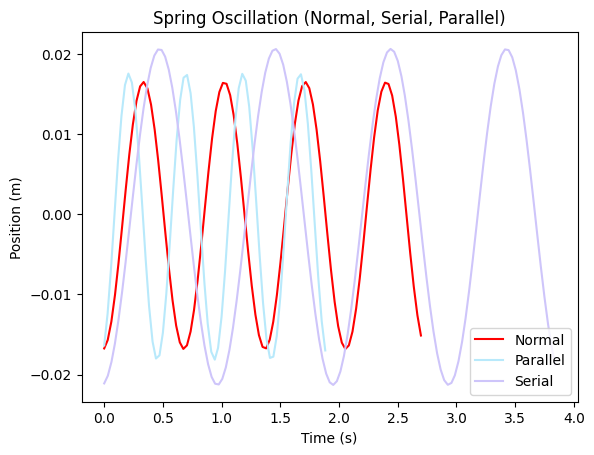

In [ ]:
plt.plot(n_mean_time_window, fitted_n_mean - np.mean(fitted_n_mean), label="Normal", color = "red")
plt.plot(p_mean_time_window, fitted_p_mean - np.mean(fitted_p_mean), label="Parallel", color = "#B8E9FB")
plt.plot(s_mean_time_window, fitted_s_mean - np.mean(fitted_s_mean), label="Serial", color = "#CEC5FA")
plt.title("Spring Oscillation (Normal, Serial, Parallel)")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [ ]:
#Calculating spring constant for spring 1
mass_s1_kg = np.array([0.099, 0.149, 0.2, 0.249])
displacement_s1_m = np.array([0.03, 0.055, 0.085, 0.110])
coeff_1, covariance_1 = np.polyfit(mass_s1_kg,displacement_s1_m, 1, cov = "True")
slope_1 = coeff_1[0]
delta_slope_1 = np.sqrt(covariance_1[0,0])
k_1 = 9.8/slope_1
delta_k_1 = (k_1/slope_1) * delta_slope_1
print("K of Spring 1: " + str(k_1) + " +- " + str(delta_k_1) + " N/m")

K of Spring 1: 18.181426459719138 +- 0.4031918288803053 N/m


In [ ]:
#Calculating spring constant for spring 2
mass_s2_kg = np.array([0.099, 0.149, 0.2, 0.249])
displacement_s2_m = np.array([0.02, 0.045, 0.075, 0.1])
coeff_2, covariance_2 = np.polyfit(mass_s2_kg,displacement_s2_m, 1, cov = "True")
slope_2 = coeff_2[0]
delta_slope_2 = np.sqrt(covariance_2[0,0])
k_2 = 9.8/slope_2
delta_k_2 = (k_2/slope_2) * delta_slope_2
print("K of Spring 2: " + str(k_2) + " +- " + str(delta_k_2) + " N/m")

K of Spring 2: 18.181426459719148 +- 0.40319182888030486 N/m


In [ ]:
#Predicted Period for Normal Oscillation
m = 0.211
del_m = 0.001
w1 = np.sqrt(m)
del_w1 = 0.5*w1*del_m/m

v1 = np.sqrt(1/k_1)
del_v1 = 0.5 * v1 * delta_k_1/k_1

z1 = w1*v1
del_z1 = z1 * np.sqrt((del_w1/w1)**2 + (del_v1/v1)**2)
T_1 = 2*np.pi*z1
del_T_1 = T_1*del_z1/z1
print("Period 1: " + str(T_1) + " +- " + str(del_T_1))

Period 1: 0.6768728884796339 +- 0.007674657694277462


In [ ]:
#Predicted Period for Parallel Oscillation
k_parallel = 2*k_1
del_k_parallel = k_parallel * delta_k_1/k_1

m = 0.211
del_m = 0.001
w1 = np.sqrt(m)
del_w1 = 0.5*w1*del_m/m

v1 = np.sqrt(1/k_parallel)
del_v1 = 0.5 * v1 * del_k_parallel/k_parallel

z1 = w1*v1
del_z1 = z1 * np.sqrt((del_w1/w1)**2 + (del_v1/v1)**2)
T_1 = 2*np.pi*z1
del_T_1 = T_1*del_z1/z1
print("Period 1: " + str(T_1) + " +- " + str(del_T_1))

Period 1: 0.478621409445275 +- 0.00542680249890911


In [ ]:
#Predicted Period for Seriel Oscillation
k_serial = k_1/2
del_k_serial = k_serial*delta_k_1/k_1

m = 0.211
del_m = 0.001
w1 = np.sqrt(m)
del_w1 = 0.5*w1*del_m/m

v1 = np.sqrt(1/k_serial)
del_v1 = 0.5 * v1 * del_k_serial/k_serial

z1 = w1*v1
del_z1 = z1 * np.sqrt((del_w1/w1)**2 + (del_v1/v1)**2)
T_1 = 2*np.pi*z1
del_T_1 = T_1*del_z1/z1
print("Period 1: " + str(T_1) + " +- " + str(del_T_1))

Period 1: 0.95724281889055 +- 0.01085360499781822


In [ ]:
print("Normal k: " + str(k_1) + " +- " + str(delta_k_1))
print("Parallel k: " + str(k_parallel) + " +- " + str(del_k_parallel))
print("Serial k: " + str(k_serial) + " +- " + str(del_k_serial))

Normal k: 18.181426459719138 +- 0.4031918288803053
Parallel k: 36.362852919438275 +- 0.8063836577606106
Serial k: 9.090713229859569 +- 0.20159591444015265
